<a href="https://colab.research.google.com/github/gumdropsteve/intro_to_machine_learning/blob/main/day_11/01_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees
https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

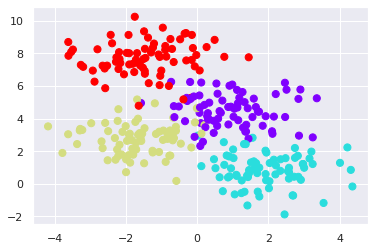

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:
X.shape

(300, 2)

In [ ]:
import pandas as pd

pd.DataFrame(X)

,0,1
0,0.024583,2.962157
1,-1.523926,7.125732
2,1.274508,5.630173
3,-0.865523,7.801218
4,0.748741,2.555794
...,...,...
295,1.919318,2.034555
296,2.827058,1.721168
297,0.080804,4.690690
298,1.447968,7.761535


https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.feature_importances_

array([0.3425493, 0.6574507])

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


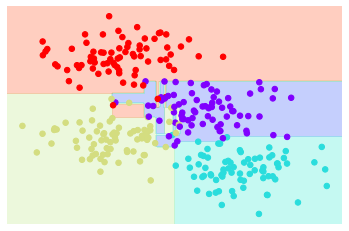

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

## Seattle Weather Data

In [ ]:
df = pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_4_ML/data/seattle_weather_1948-2017.csv')

df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numrows = 25549 

decision_tree_df = pd.DataFrame({'today':[0.0]*numrows,
                             'tomorrow':[True]*numrows})

#sort columns for convience
seq = ['today',
       'tomorrow']

decision_tree_df = decision_tree_df.reindex(columns=seq)

for i in range(0 , numrows):
    tomorrow = df.iloc[i,1]
    today = df.iloc[(i-1),1]
    decision_tree_df.iat[i,1] = tomorrow
    decision_tree_df.iat[i,0] = today

decision_tree_df = decision_tree_df.dropna()  # exclude any rows with missing data
decision_tree_df

,today,tomorrow
0,0.00,True
1,0.47,True
2,0.59,True
3,0.42,True
4,0.31,True
...,...,...
25544,0.00,False
25545,0.00,False
25546,0.00,False
25547,0.00,False


In [ ]:
from sklearn.model_selection import train_test_split

X = decision_tree_df['today']
y = decision_tree_df['tomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(pd.DataFrame(X_train), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.predict(pd.DataFrame(X_test))

array([False, False, False, ..., False, False, False])

In [ ]:
from sklearn.metrics import accuracy_score

preds = dtc.predict(pd.DataFrame(X_test))

accuracy_score(y_test, preds)

0.7128131524008351

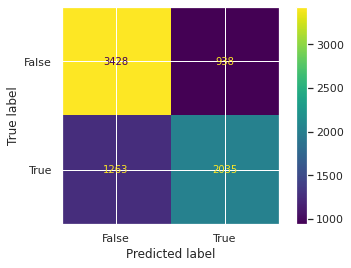

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dtc, pd.DataFrame(X_test), y_test, values_format='')

## Dog or Horse

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/dog_or_horse.csv')

df = df.drop('type', axis=1)

X = df[['height', 'weight']]
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### What's actually going on??

In [ ]:
pd.concat([X_train, y_train], axis=1).tail(10)

,height,weight,target
4,28.0,91.0,0.0
182,65.0,119.0,1.0
44,28.0,74.0,0.0
54,34.0,96.0,0.0
147,69.0,167.0,1.0
149,79.0,151.0,1.0
184,79.0,167.0,1.0
45,25.0,60.0,0.0
9,27.0,68.0,0.0
86,40.0,105.0,0.0


In [ ]:
left = 1 - ((4 / (4+2))**2) - ((2 / (4+2))**2)
right = 1 - ((0/4)**2) - ((4/4)**2) 
(right * (6/10)) + (left * (4/10))

0.1777777777777778

In [ ]:
1 - ((0/4)**2) - ((4/4)**2) 

0.0

In [ ]:
# 1 - probability of yes ^2 - probability of no ^2
1 - ((4 / (4+2))**2) - ((2 / (4+2))**2)

0.4444444444444445

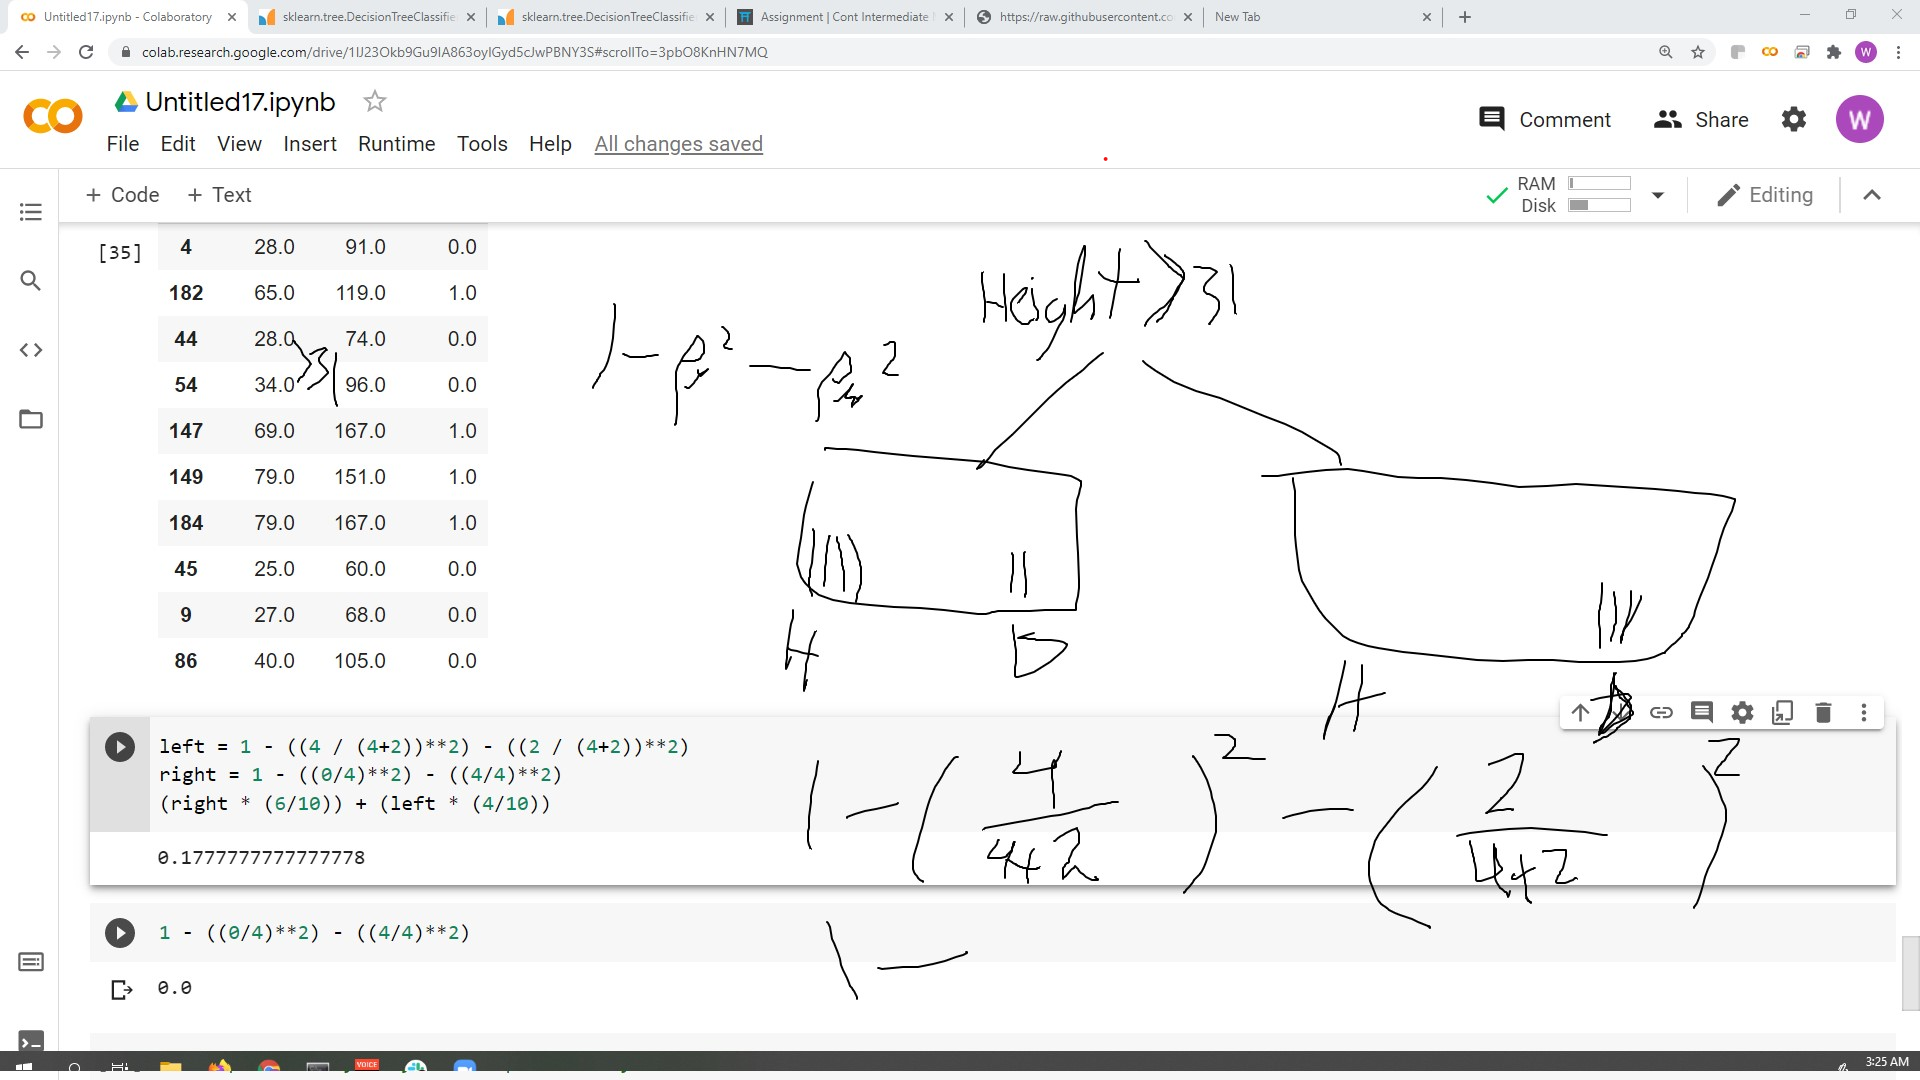

#### Doing it...

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc.feature_importances_

array([0.92503624, 0.07496376])

In [ ]:
preds = dtc.predict(X_test)

In [ ]:
accuracy_score(y_test, preds)

0.9833333333333333

In [ ]:
from sklearn.tree import plot_tree



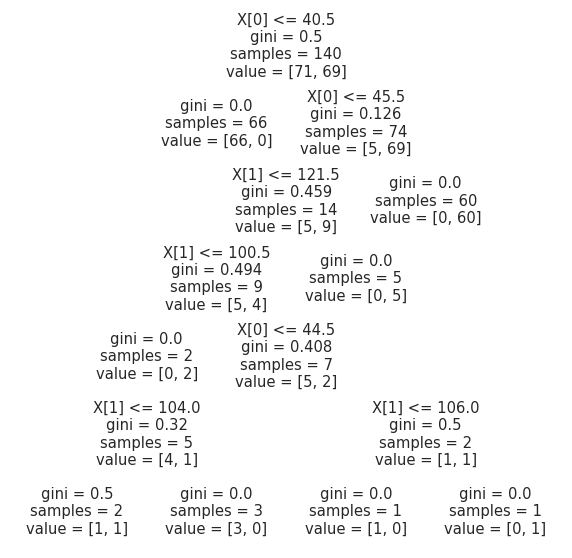

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plot_tree(dtc);

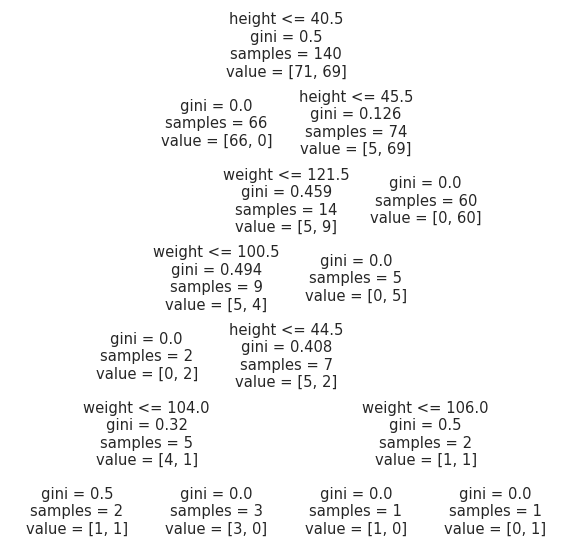

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plot_tree(dtc, feature_names=['height', 'weight']);

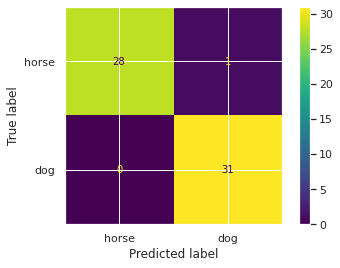

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test, display_labels=['horse', 'dog'])